In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib
import matplotlib.pyplot as plt

/kaggle/input/weatheraus/weatherAUS.csv


## Модуль А ##

* 1. Загрузка данных

In [60]:
df=pd.read_csv('../input/weatheraus/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

* 2. Предобработка данных

In [62]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [63]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [64]:
import seaborn as sns


,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


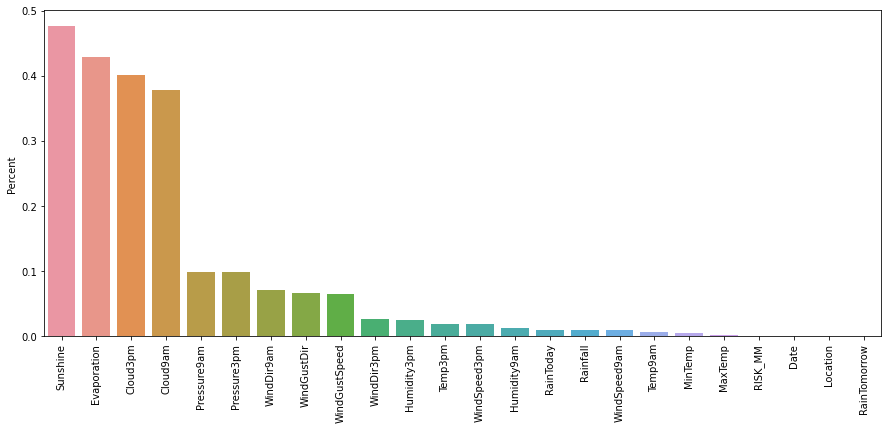

In [65]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
missing_data

Гистограмма показывает процент отсутствующих значений для каждого столбца. Поэтому убираем столбцы 'Sunshine','Evaporation','Cloud3pm','Cloud9am', а так же 'Date', 'RISK_MM' и 'Location'(поскольку это только для Австралии, поэтому они не требуются).

In [66]:
df=df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1)
df=df.drop(['Date','Location','RISK_MM'],axis=1)

Заменим значения 'NO' и 'YES' на 0 и 1

In [67]:
df['RainTomorrow']=df['RainTomorrow'].map({'No':0,'Yes':1})
df['RainToday']=df['RainToday'].map({'No':0,'Yes':1})

Отбросим строки где есть NAn

In [68]:
df=df.dropna(how='any')

Заменим абревиатуры цифрами, чтобы избежать ошибок в обучении.

In [69]:
df['WindDir9am']=df['WindDir9am'].map({'W':0, 'NNW':1, 'SE':2, 'ENE':3, 'SW':4, 'SSE':5, 'S':6, 'NE':7, 'SSW':8, 'N':9, 'WSW':10,
       'ESE':11, 'E':12, 'NW':13, 'WNW':14,
       'NNE':15
})

In [70]:
df['WindDir3pm']=df['WindDir3pm'].map({'WNW':0, 'WSW':1, 'E':2, 'NW':3, 'W':4, 'SSE':5, 'ESE':6, 'ENE':7, 'NNW':8, 'SSW':9,
       'SW':10, 'SE':11, 'N':12, 'S':13, 'NNE':14,
        'NE':15})

In [71]:
df['WindGustDir']=df['WindGustDir'].map({'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9,
       'S':10, 'NW':11, 'SE':12, 'ESE':13, 
       'E':14, 'SSW':15})

In [72]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


Еще раз проверим наличие пустых значений

In [73]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

* 3. Предварительное изучение

Представлен анализ переменных в табличном виде (максимальное, минимальное значение, среднеквадратичное отклонение, среднее, квартили) 

In [74]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,7.572468,40.786611,7.444481,7.442630,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,0.224654,0.221554
std,6.254135,6.982702,8.602968,4.685639,13.321774,4.537911,4.579411,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,0.417356,0.415294
min,-8.200000,2.600000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000
25%,8.100000,18.300000,0.000000,3.000000,31.000000,4.000000,4.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,0.000000,0.000000
50%,12.400000,23.100000,0.000000,8.000000,39.000000,7.000000,7.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,0.000000,0.000000
75%,17.200000,28.700000,0.800000,12.000000,48.000000,11.000000,11.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,0.000000,0.000000
max,33.900000,48.100000,367.600000,15.000000,135.000000,15.000000,15.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


Графический вид данных

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'WindGustDir'}>],
       [<AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindDir9am'}>,
        <AxesSubplot:title={'center':'WindDir3pm'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>],
       [<AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>,
        <AxesSubplot:title={'center':'RainToday'}>],
       [<AxesSubplot:title={'center':'RainTomorrow'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

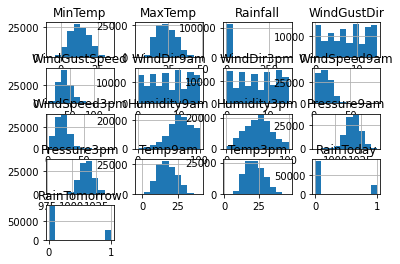

In [75]:
df.hist()

## Модуль B ##

* 1. ОТБОР ПРИЗНАКОВ

Все ненужные столбцы мы уже выкинули.

* 2.ВИЗУАЛЬНОЕ ОБОСНОВАНИЕ ВЫБОРА ПЕРЕМЕННЫХ

Посмотрим зависимость "RainTomorrow" от других столбцов

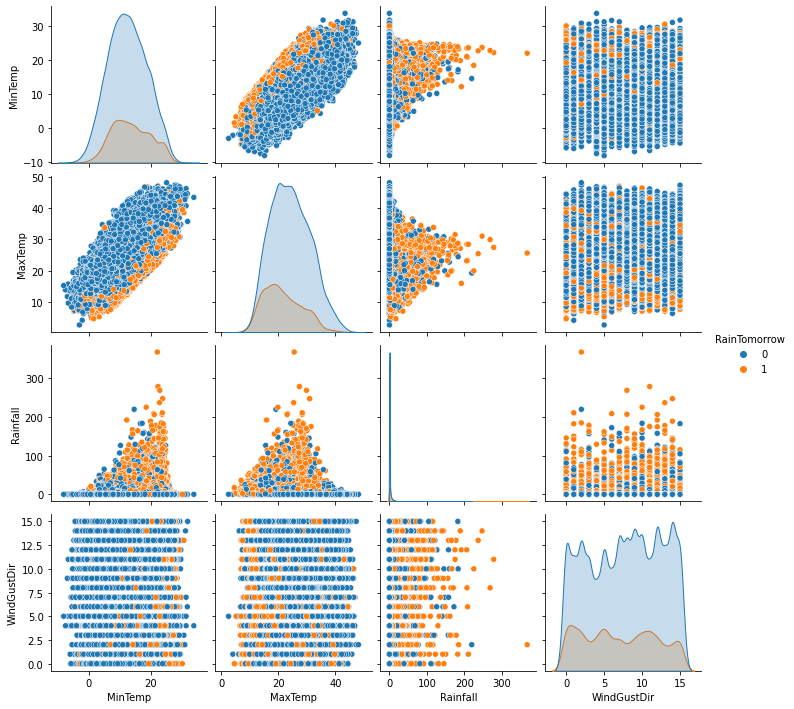

In [76]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
tmp = df.select_dtypes(include=numerics)
tmp["RainTomorrow"]= df["RainTomorrow"]

sns.pairplot(tmp, vars = tmp.columns[:4],hue="RainTomorrow")
plt.show()

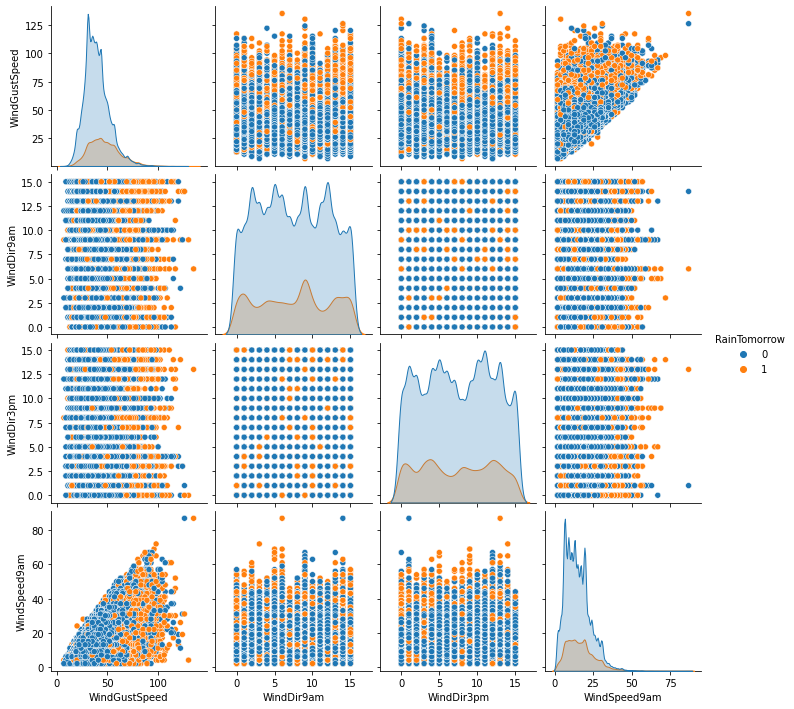

In [77]:
sns.pairplot(tmp, vars = tmp.columns[4:8],hue="RainTomorrow")
plt.show()

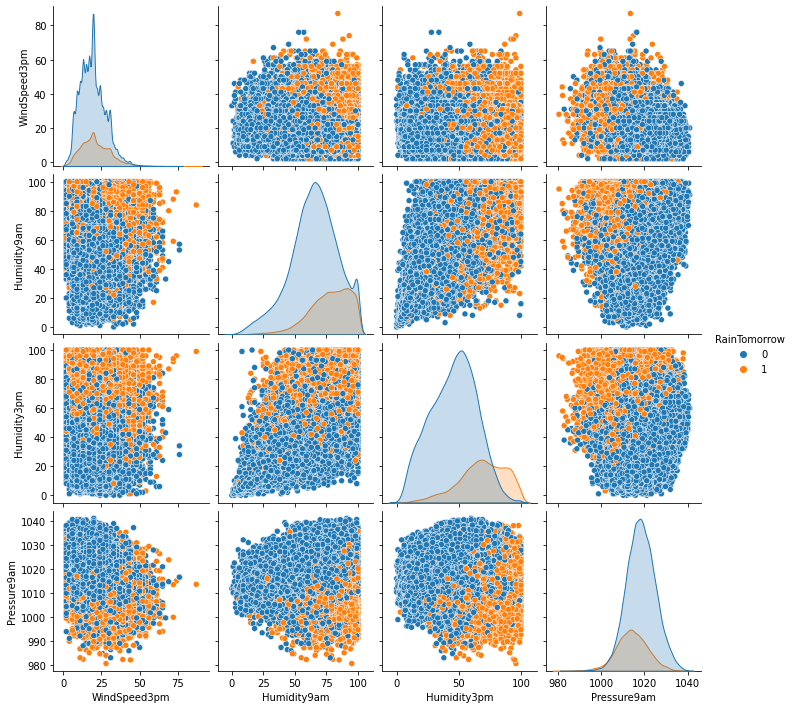

In [78]:
sns.pairplot(tmp, vars = tmp.columns[8:12],hue="RainTomorrow")
plt.show()

<AxesSubplot:xlabel='RainToday', ylabel='count'>

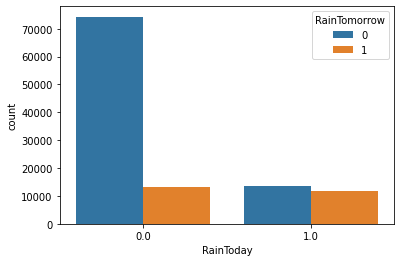

In [79]:
sns.countplot(x = 'RainToday', hue =  'RainTomorrow', orient = 'h', data = df)

* 2. РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [81]:
x = df.drop(labels = ['RainTomorrow'],axis = 1)
x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [82]:
y = df['RainTomorrow']
x = sc.fit_transform(x)
x.shape

(112925, 16)

Сделаем случайную выборку, так как мы работаем с погодой.

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 40)
x_test,x_validation,y_test,y_validation = train_test_split(x_test,y_test,test_size = 0.5,random_state = 40)

* 4. Обучение модели

In [84]:
import keras
from keras.models import Sequential

In [85]:
classifier = Sequential()

In [86]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [89]:
classifier.fit(x_train,y_train,epochs = 50,batch_size=10)

Epoch 1/50
6776/6776 [==============================] - 5s 698us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 2/50
6776/6776 [==============================] - 5s 698us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 3/50
6776/6776 [==============================] - 5s 702us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 4/50
6776/6776 [==============================] - 5s 698us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 5/50
6776/6776 [==============================] - 5s 704us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 6/50
6776/6776 [==============================] - 5s 735us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 7/50
6776/6776 [==============================] - 5s 711us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 8/50
6776/6776 [==============================] - 5s 704us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 9/50
6776/6776 [==============================] - 5s 681us/step - loss: 3.8326 - accuracy: 0.0384
Epoch 10/50
6776/6776 [==============================] - 5s 688u

In [90]:
y_pred = classifier.predict_classes(x_test)
y_train_pred = classifier.predict_classes(x_train)
y_validation_pred = classifier.predict_classes(x_validation)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [91]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Training Accuracy = ',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy  = ',accuracy_score(y_test,y_pred))
print('Validation Accuracy  = ',accuracy_score(y_validation,y_validation_pred))

Training Accuracy =  0.038388310825769316
Testing Accuracy  =  0.03967234890413992
Validation Accuracy  =  0.03847686517600177
